# Empirische Verteilungsfunktion mit Histogramm

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_empirical_cdf_with_histogram(
        data, class_bins, xlabel="Wert", ylabel="Kumulative Häufigkeit", title="Empirische Verteilungsfunktion", 
        yCoord=0.1, x_Coord_delta=0.1, show_histogram=True
    ):
    """
    Plots a minimalist empirical cumulative distribution function (ECDF) for a given dataset and optionally adds a histogram of relative frequencies below.
    Displays the y-value (cumulative probability) next to each point along with the distance between points.
    
    Parameters
    ----------
    data : list or array-like
        The dataset for which the ECDF is computed and plotted.
        
    class_bins : list or array-like
        The class boundaries for creating the histogram bins.
        
    xlabel : str, optional
        Label for the x-axis. Defaults to "Wert".
        
    ylabel : str, optional
        Label for the y-axis. Defaults to "Kumulative Häufigkeit".
        
    title : str, optional
        Title of the plot. Defaults to "Empirische Verteilungsfunktion".
        
    yCoord : float, optional
        Offset for the y-values displayed next to each point in the ECDF plot. Defaults to 0.1.
        
    x_Coord_delta : float, optional
        Horizontal offset for displaying differences between cumulative frequencies. Defaults to 0.1.
        
    show_histogram : bool, optional
        If True, displays the histogram of relative frequencies below the ECDF plot. Defaults to True.
        
    Returns
    -------
    None
        The function creates and displays a plot of the ECDF and optionally the histogram.
    """
    # Zähle die Anzahl der Werte in jeder Klasse
    n_i, _ = np.histogram(data, bins=class_bins)

    # Berechne die relative Häufigkeit (h_i)
    total_count = len(data)
    h_i = n_i / total_count
    
    # Berechne die kumulative Häufigkeit (F(x_i))
    cum_frequency = h_i.cumsum()
    
    # Setup für das Plot-Layout
    if show_histogram:
        fig, (ax_cdf, ax_hist) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)
    else:
        fig, ax_cdf = plt.subplots(1, 1, figsize=(10, 6))
    
    # Schritte der kumulierten Häufigkeit anzeigen, angepasst an die Klassenintervallgrenzen
    for i in range(len(class_bins) - 1):
        ax_cdf.plot(
            [class_bins[i], class_bins[i + 1]], 
            [cum_frequency[i], cum_frequency[i]], 
            color="dodgerblue", linestyle="--", linewidth=1.5, alpha=0.7
        )
        
        if i < len(class_bins) - 2:
            ax_cdf.plot(
                [class_bins[i + 1], class_bins[i + 1]], 
                [cum_frequency[i], cum_frequency[i + 1]], 
                color="dodgerblue", linestyle="--", linewidth=1.5, alpha=0.7
            )

    # Punkte an den Klassenintervallgrenzen anzeigen
    for i in range(len(class_bins) - 1):
        ax_cdf.scatter(
            class_bins[i + 1], cum_frequency[i], 
            color="dodgerblue", s=35, zorder=3
        )
    
    # Anzeige der y-Werte und der Abstände zwischen den Punkten
    previous_y = 0
    for x, y in zip(class_bins[1:], cum_frequency):
        ax_cdf.text(
            x=x - x_Coord_delta, 
            y=y + yCoord, 
            s=f'{y:.4f}', 
            ha='left', va='center', 
            fontsize=6, color="black", alpha=0.8
        )
        
        distance = y - previous_y
        ax_cdf.text(
            x=x + x_Coord_delta, 
            y=(y + previous_y) / 2,
            s=f'Δ={distance:.4f}', 
            ha='center', va='center', 
            fontsize=7, color="red", alpha=0.7
        )
        previous_y = y
    
    # Setzen der Klassenintervallgrenzen als xticks
    ax_cdf.set_xticks(class_bins)
    ax_cdf.set_xticklabels([f"{bin}" for bin in class_bins], rotation=45)
    
    # Achsenbeschriftungen und Titel für CDF
    ax_cdf.set_ylabel(ylabel, fontsize=11)
    ax_cdf.set_title(title, fontsize=13, weight='bold')
    ax_cdf.set_xlim(min(class_bins) - 0.5, max(class_bins) + 0.5)
    ax_cdf.grid(True, linestyle="--", alpha=0.7, axis="y")
    
    if show_histogram:
        # Histogramm der relativen Häufigkeiten in der unteren Achse
        bar_widths = [class_bins[i + 1] - class_bins[i] for i in range(len(class_bins) - 1)]
        bars = ax_hist.bar(
            class_bins[:-1],
            h_i, width=bar_widths,
            align='edge',
            color="dodgerblue",
            alpha=0.6,
            edgecolor="white"
        )
        
        # Höhe der Balken über jedem Balken anzeigen
        for bar, height in zip(bars, h_i):
            ax_hist.text(
                bar.get_x() + bar.get_width() / 2, height + 0.005,
                f'{height:.4f}', ha='center', va='bottom', fontsize=8, color="black"
            )
        
        ax_hist.set_ylabel("Relative Häufigkeit", fontsize=11)
        ax_hist.set_xlabel(xlabel, fontsize=11)
        ax_hist.grid(True, linestyle="--", alpha=0.7, axis="y")

    sns.despine()
    plt.tight_layout()

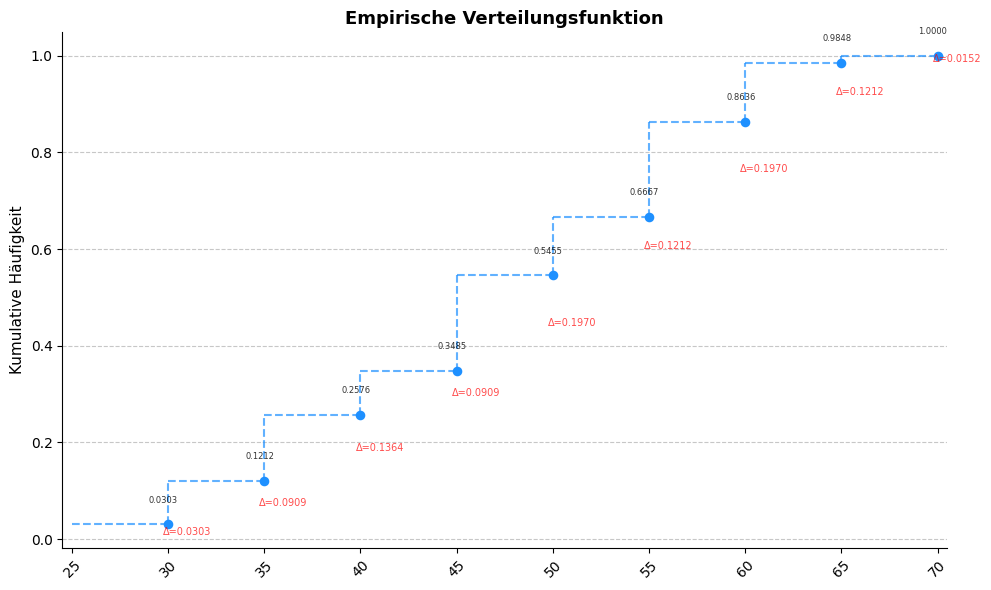

In [3]:
# Daten und Klassenbins
data = [
    31, 43, 45, 32, 54, 55, 47, 44, 56, 34,
    35, 56, 29, 46, 59, 46, 48, 45, 59, 32,
    29, 54, 41, 52, 60, 47, 64, 62, 48, 34,
    60, 46, 39, 66, 59, 38, 50, 64, 56,
    35, 44, 43, 55, 46, 42, 56, 59, 46,
    52, 39, 34, 63, 56, 55, 64, 48, 38,
    38, 35, 37, 49, 53, 52, 61, 50, 57
]
class_bins = [25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

# Funktion ausführen
plot_empirical_cdf_with_histogram(data=data, class_bins=class_bins, yCoord=0.05, x_Coord_delta=1, xlabel="Lebensalter", show_histogram=False)